<a href="https://colab.research.google.com/github/rimshaharmaen/OnlineRetailCustomerSegmentation/blob/main/Online_Retail_Customer_SegmentationCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import missingno as msno
from datetime import datetime
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
file_path = '/content/drive/MyDrive/Capstone Project-Online Retail Customer Segmentation/Online Retail.xlsx'

# Read the Excel file
customer_data_df = pd.read_excel(file_path)

In [5]:
customer_data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
customer_data_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
customer_data_df.shape

(541909, 8)

In [10]:
customer_data_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [56]:
customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [57]:
customer_data_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [58]:
customer_data_df.dropna(inplace=True)

In [59]:
customer_data_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
customer_data_df.shape

(406829, 8)

In [61]:
customer_data_df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [62]:
customer_data_df.duplicated().sum()

5225

In [63]:
customer_data_df['InvoiceNo'].unique()#c value

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [66]:
# Convert 'InvoiceNo' column to strings
customer_data_df['InvoiceNo'] = customer_data_df['InvoiceNo'].astype(str)

# Remove rows where 'InvoiceNo' starts with 'C'
customer_data_df = customer_data_df[~customer_data_df['InvoiceNo'].str.startswith('C', na=False)]


In [69]:
customer_data_df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


EDA

Top 10 countries

In [74]:
top_countries = customer_data_df['Country'].value_counts().nlargest(10)
total_purchases = customer_data_df['Country'].count()
country_percentages = (top_countries / total_purchases) * 100

country_summary = pd.DataFrame({
    'Country': top_countries.index,
    'Count': top_countries.values,
    'Percentage': country_percentages.values
})

print(country_summary)


          Country   Count  Percentage
0  United Kingdom  354345   89.048411
1         Germany    9042    2.272293
2          France    8342    2.096380
3            EIRE    7238    1.818940
4           Spain    2485    0.624491
5     Netherlands    2363    0.593832
6         Belgium    2031    0.510399
7     Switzerland    1842    0.462902
8        Portugal    1462    0.367407
9       Australia    1185    0.297796


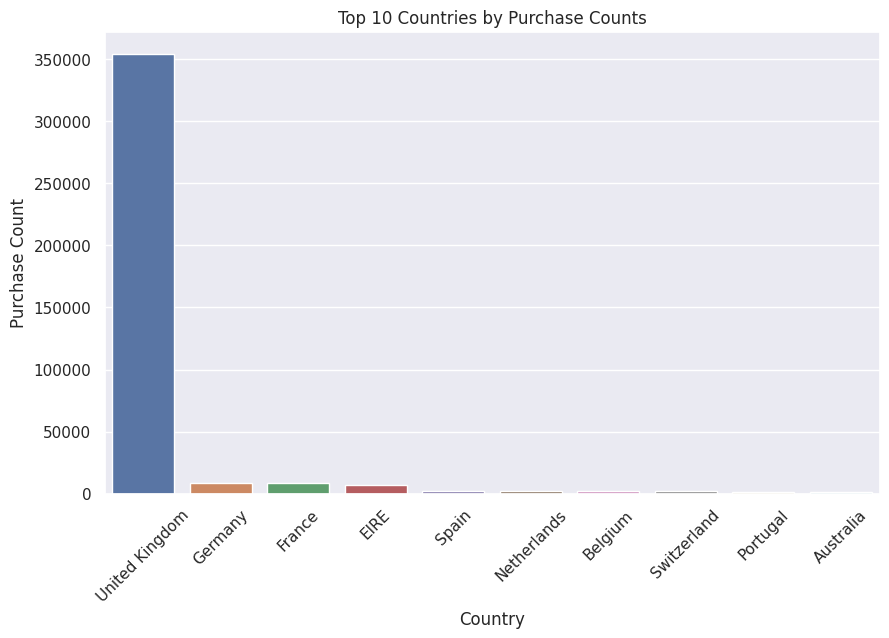

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', data=country_summary)
plt.title('Top 10 Countries by Purchase Counts')
plt.xlabel('Country')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.show()


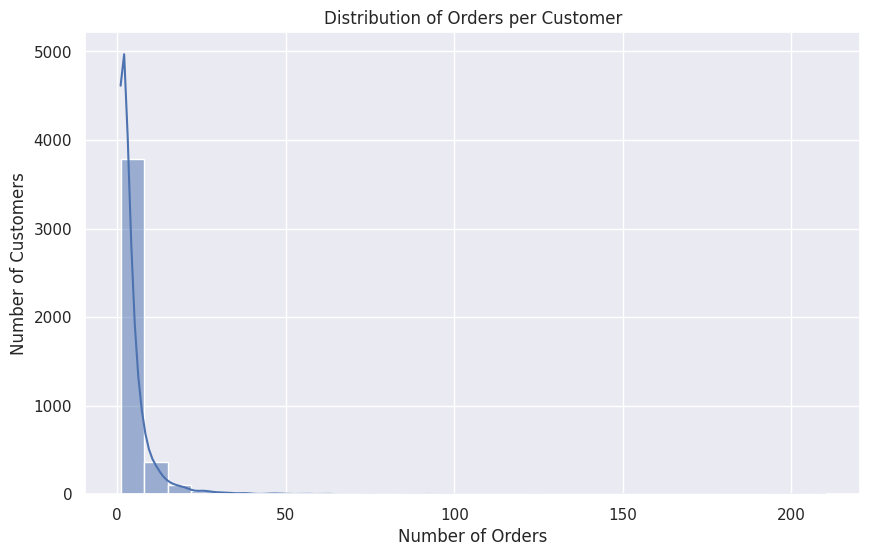

In [77]:
orders_per_customer = customer_data_df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=30, kde=True)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()


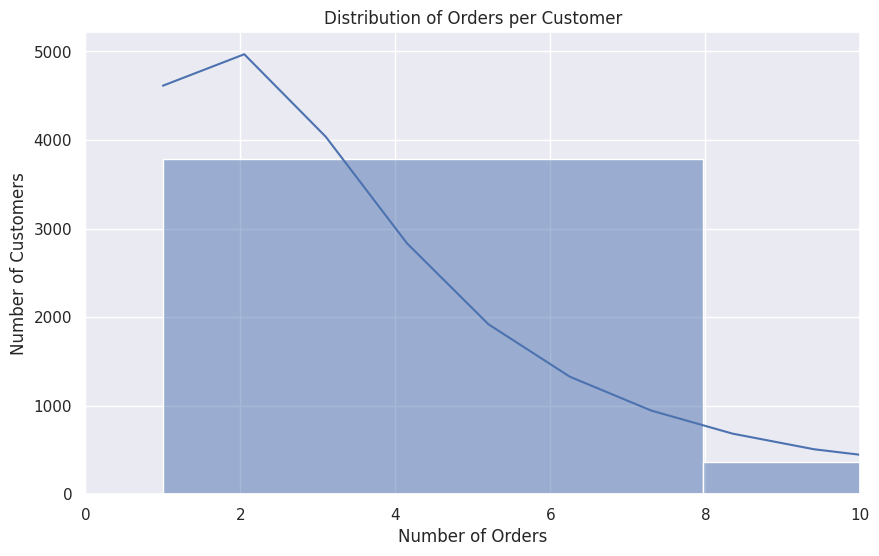

In [78]:
orders_per_customer = customer_data_df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=30, kde=True)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Set the x-axis limits to focus on a specific range
plt.xlim(0, 10)  # Adjust the limits as needed

plt.show()


What is the distribution of purchases across different days of the week?

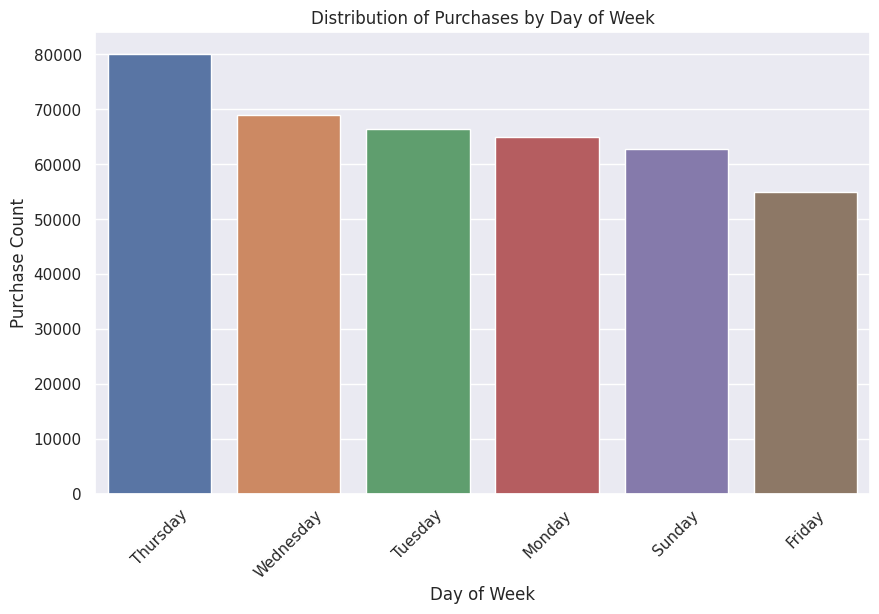

In [88]:
customer_data_df['InvoiceDate'] = pd.to_datetime(customer_data_df['InvoiceDate'])
customer_data_df['DayOfWeek'] = customer_data_df['InvoiceDate'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data_df, x='DayOfWeek', order=customer_data_df['DayOfWeek'].value_counts().index)
plt.title('Distribution of Purchases by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.show()


How does the average UnitPrice vary?

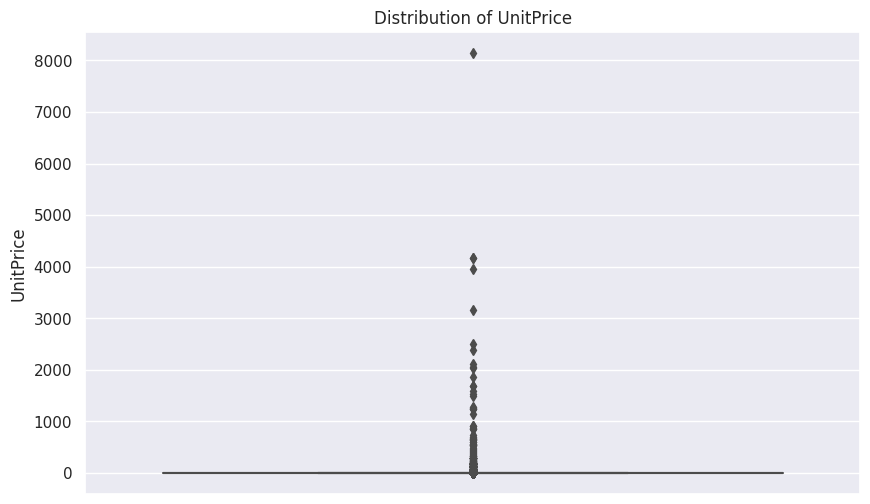

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data_df, y='UnitPrice')
plt.title('Distribution of UnitPrice')
plt.ylabel('UnitPrice')
plt.show()


Top 5 countries who generated highest revenue

In [97]:
# Add a new column for total cost
customer_data_df['TotalCost'] = customer_data_df['Quantity'] * customer_data_df['UnitPrice']

# Group the data by country and sum the total cost
country_revenue = customer_data_df.groupby('Country')['TotalCost'].sum().reset_index()

# Sort the countries by revenue and get the top 10 with highest revenue
highest_revenue = country_revenue.sort_values('TotalCost', ascending=False).head(5)
# Print the top 10 countries with highest revenue
print(highest_revenue)



           Country    TotalCost
35  United Kingdom  7308391.554
23     Netherlands   285446.340
10            EIRE   265545.900
14         Germany   228867.140
13          France   209024.050


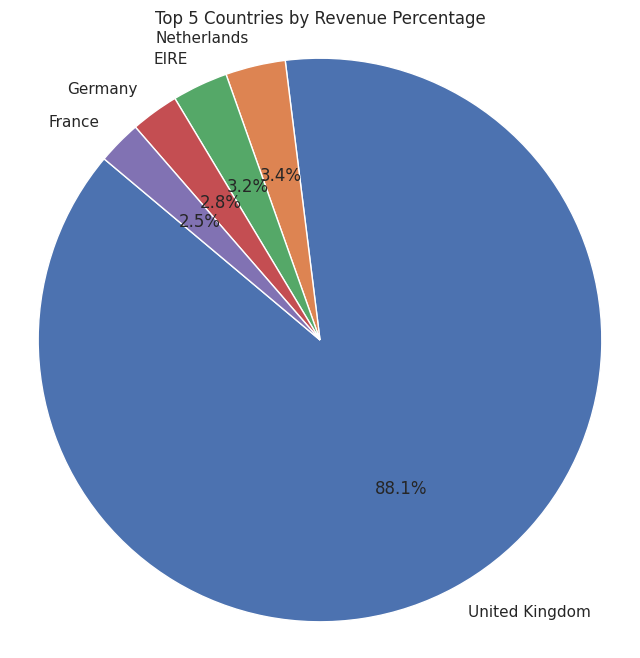

In [98]:
plt.figure(figsize=(8, 8))
plt.pie(highest_revenue['TotalCost'], labels=highest_revenue['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries by Revenue Percentage')
plt.axis('equal')
plt.show()

Top 5 Countries generating lowest total revenue

In [100]:
# Add a new column for total cost
customer_data_df['TotalCost'] = customer_data_df['Quantity'] * customer_data_df['UnitPrice']

# Group the data by country and sum the total cost
country_revenue = customer_data_df.groupby('Country')['TotalCost'].sum().reset_index()

# Sort the countries by revenue and get the top 10 with lowest revenue
lowest_revenue = country_revenue.sort_values('TotalCost').head(10)
# Print the top 10 countries with highest revenue
print(lowest_revenue)

                 Country  TotalCost
28          Saudi Arabia     145.92
2                Bahrain     548.40
8         Czech Republic     826.74
27                   RSA    1002.31
4                 Brazil    1143.60
11    European Community    1300.25
21             Lithuania    1661.06
20               Lebanon    1693.88
34  United Arab Emirates    1902.28
36           Unspecified    2667.07


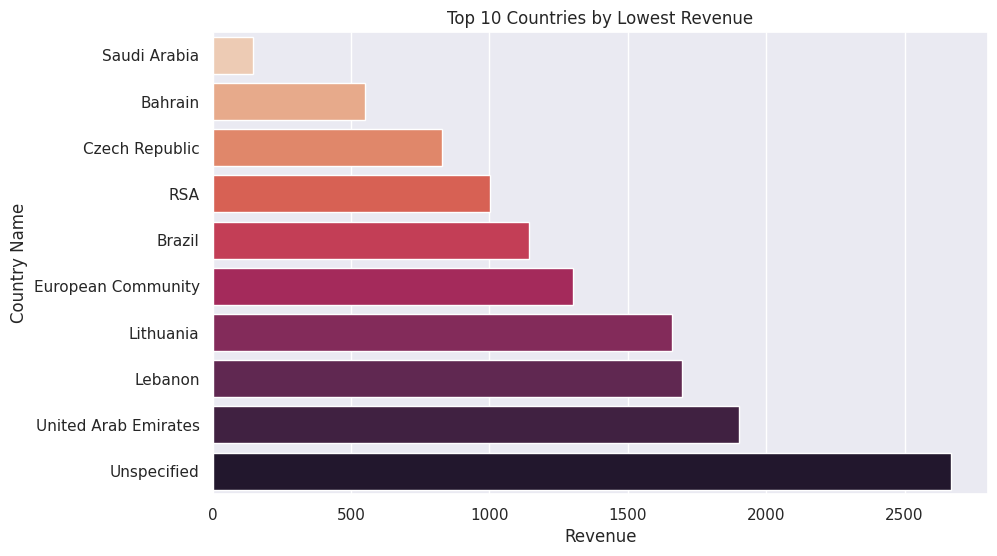

In [101]:
# Create a horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='TotalCost', y='Country', data=lowest_revenue, palette='rocket_r')
# Set the title and axis labels
ax.set_title('Top 10 Countries by Lowest Revenue')
ax.set_xlabel('Revenue')
ax.set_ylabel('Country Name')
# Show the plot
plt.show()